In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [2]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("rad/new.root","READ")
tfile = ROOT.TFile("two/new.root","READ")
ds = rfile["tree"]
dt = tfile["tree"]

In [3]:
from math import sqrt
my_events  = []
my_events2 = []
for ev in ds:
    lCSC  = sqrt( ev.xCSC**2 + ev.yCSC**2 )
    zTPC  = ev.zpos+2.19+ROOT.gRandom.Gaus(0,0.2576)
    Treco = ev.Tp+ROOT.gRandom.Gaus(0,0.05)
    evt = {"T":Treco, "l":lCSC, "Z":zTPC, "Atr":ev.THETAe, "Ttr":ev.Tp, "Ztr":ev.zpos}
    my_events.append( evt )
print("EVENTS SELECTED (rad.tail): " + str(len(my_events)))
for ev in dt:
    lCSC  = sqrt( ev.xCSC**2 + ev.yCSC**2 )
    zTPC  = ev.zpos+2.19+ROOT.gRandom.Gaus(0,0.2576)
    Treco = ev.Tp+ROOT.gRandom.Gaus(0,0.05)
    evt = {"T":Treco, "l":lCSC, "Z":zTPC, "Atr":ev.THETAe, "Ttr":ev.Tp, "Ztr":ev.zpos}
    my_events2.append( evt )
print("EVENTS SELECTED (two body): " + str(len(my_events2)))

EVENTS SELECTED (rad.tail): 250000
EVENTS SELECTED (two body): 250000


h1: mean=( 136.611 +- 0.0425021 )	 rms=( 8.18846 +- 0.1881 )	0.06021415336720899
h2: mean=( 135.193 +- 0.00205097 )	 rms=( 0.379567 +- 4.40333 )	( 1.51707e-05 +- 2.3015e-10 )
list mean  137.81799665710273 +- 0.09181864616986561
list sigma 17.747620394054824
list mean    137.81799665710273
list meadian 135.14600694179535  135.1040005683899 0.00029597620351323755
list mode    135.19999384880066


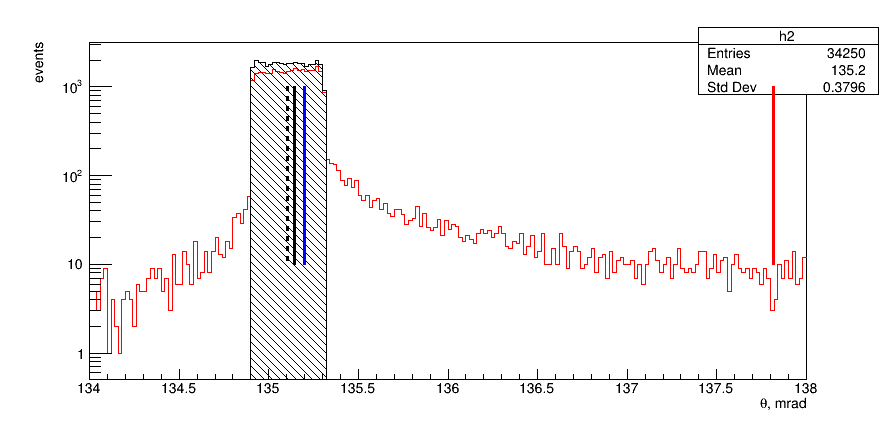

In [4]:
from statistics import mean, median, stdev, mode
h1 = ROOT.TH1F("h1",";#theta, mrad;events",10000,50,250)
h2 = ROOT.TH1F("h2",";#theta, mrad;events",10000,50,250)
hT = ROOT.TH1F("hT",";#theta, mrad;events",10000,50,250)
h2.SetLineColor(2)
hT.SetLineColor(1)
hT.SetFillColor(1)
hT.SetFillStyle(3005)
evts = 0.
thetas = []
theta2 = []
for ev in my_events:
    if ev["Ttr"]>4.985 and ev["Ttr"]<5.015:
        h1.Fill(1000.*ev["Atr"])
    if ev["Ttr"]>4.985 and ev["Ttr"]<5.015:
        h2.Fill(1000.*ev["Atr"])
        thetas.append( 1000.*ev["Atr"] )
        evts+=1.
evts2=0.
for ev in my_events2:
    if ev["Ttr"]>4.985 and ev["Ttr"]<5.015:
        hT.Fill(1000.*ev["Atr"])
        theta2.append( 1000.*ev["Atr"] )
        evts2+=1.
h2.GetXaxis().SetRangeUser(134,138)
h2.Draw()
hT.Draw("same")
Line =ROOT.TLine( mean(thetas), 10, mean(thetas),1000)
Line.SetLineWidth(3)
Line.SetLineColor(2)
Line2 =ROOT.TLine( median(thetas), 10, median(thetas),1000)
Line2.SetLineWidth(3)
Line2t =ROOT.TLine( median(theta2), 10, median(theta2),1000)
Line2t.SetLineWidth(3)
Line2t.SetLineStyle(7)
Line3 =ROOT.TLine( mode(thetas), 10, mode(thetas),1000)
Line3.SetLineWidth(3)
Line3.SetLineColor(4)
Line.Draw("same")
Line2.Draw("same")
Line2t.Draw("same")
Line3.Draw("same")
ROOT.gPad.SetLogy()
canv.Draw()
print("h1: mean=" + str(h1.mean()) + "\t rms=" + str(h1.rms()) + "\t" + str(h1.rms().value()/sqrt(18493.)))
print("h2: mean=" + str(h2.mean()) + "\t rms=" + str(h2.rms()) + "\t" + str(h2.mean().prec()))
print("list mean  " + str(mean(thetas)) + " +- " + str(stdev(thetas)/sqrt(evts)))
print("list sigma " + str(stdev(thetas)) )
print("list mean    " + str(mean(thetas)) )
print("list meadian " + str(median(thetas)) + "  " + str(median(theta2)) + " " + str(0.04/135.146) )
print("list mode    " + str(mode(thetas)) )

h1: mean=( 136.603 +- 0.0450204 )	 rms=( 8.36713 +- 0.19314 )	0.061528008551818454
h2: mean=( 135.181 +- 0.00366032 )	 rms=( 0.636043 +- 2.83442 )	( 2.70771e-05 +- 7.33169e-10 )
list mean  137.75284447351046 +- 0.09361598092191921
list sigma 17.45304201654412
list mean    137.75284447351046
list meadian 135.17199456691742  135.05999743938446 0.00029597620351323755
list mode    134.90700721740723


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hT (Potential memory leak).


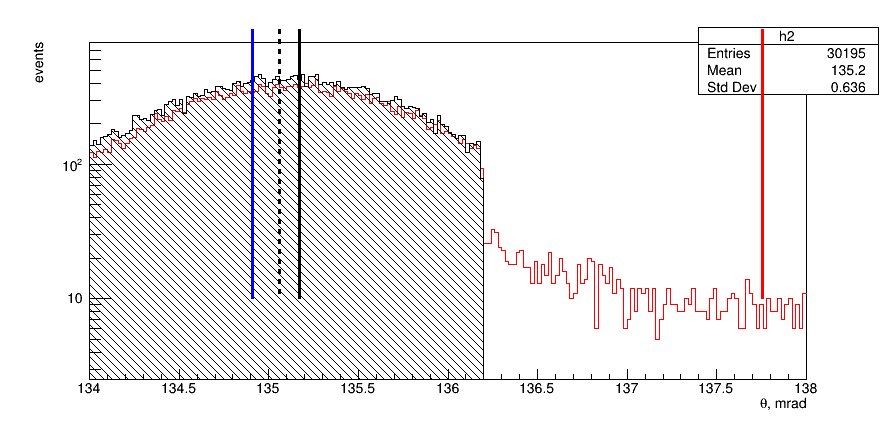

In [5]:
from statistics import mean, median, stdev, mode
h1 = ROOT.TH1F("h1",";#theta, mrad;events",10000,50,250)
h2 = ROOT.TH1F("h2",";#theta, mrad;events",10000,50,250)
hT = ROOT.TH1F("hT",";#theta, mrad;events",10000,50,250)
h2.SetLineColor(2)
hT.SetLineColor(1)
hT.SetFillColor(1)
hT.SetFillStyle(3005)
evts = 0.
thetas = []
theta2 = []
for ev in my_events:
    if ev["T"]>4.985 and ev["T"]<5.015:
        h1.Fill(1000.*ev["Atr"])
    if ev["T"]>4.985 and ev["T"]<5.015:
        h2.Fill(1000.*ev["Atr"])
        thetas.append( 1000.*ev["Atr"] )
        evts+=1.
evts2=0.
for ev in my_events2:
    if ev["T"]>4.985 and ev["T"]<5.015:
        hT.Fill(1000.*ev["Atr"])
        theta2.append( 1000.*ev["Atr"] )
        evts2+=1.
h2.GetXaxis().SetRangeUser(134,138)
h2.Draw()
hT.Draw("same")
Line =ROOT.TLine( mean(thetas), 10, mean(thetas),1000)
Line.SetLineWidth(3)
Line.SetLineColor(2)
Line2 =ROOT.TLine( median(thetas), 10, median(thetas),1000)
Line2.SetLineWidth(3)
Line2t =ROOT.TLine( median(theta2), 10, median(theta2),1000)
Line2t.SetLineWidth(3)
Line2t.SetLineStyle(7)
Line3 =ROOT.TLine( mode(thetas), 10, mode(thetas),1000)
Line3.SetLineWidth(3)
Line3.SetLineColor(4)
Line.Draw("same")
Line2.Draw("same")
Line2t.Draw("same")
Line3.Draw("same")
ROOT.gPad.SetLogy()
canv.Draw()
print("h1: mean=" + str(h1.mean()) + "\t rms=" + str(h1.rms()) + "\t" + str(h1.rms().value()/sqrt(18493.)))
print("h2: mean=" + str(h2.mean()) + "\t rms=" + str(h2.rms()) + "\t" + str(h2.mean().prec()))
print("list mean  " + str(mean(thetas)) + " +- " + str(stdev(thetas)/sqrt(evts)))
print("list sigma " + str(stdev(thetas)) )
print("list mean    " + str(mean(thetas)) )
print("list meadian " + str(median(thetas)) + "  " + str(median(theta2)) + " " + str(0.04/135.146) )
print("list mode    " + str(mode(thetas)) )

33639 events
TRUE mean 135.1729929447174 mrad.
REC. mean ( 135.055 +- 0.0185344 ) mrad.	( 0.000137236 +- 1.88337e-08 )

****************************************
Minimizer is Linear / Migrad
Chi2                      =      284.028
NDf                       =           35
p0                        =     0.585098   +/-   0.0120874   
p1                        =     0.135882   +/-   1.88766e-05 


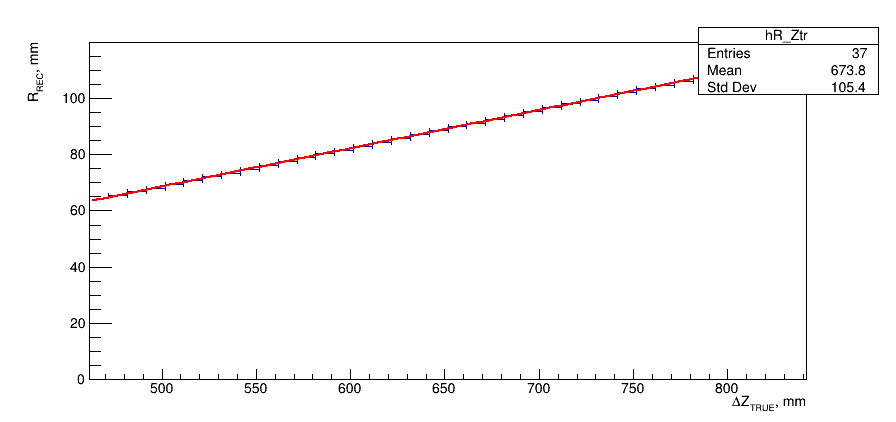

In [6]:
hR_Ztr = ROOT.TH1F("hR_Ztr",";#DeltaZ_{TRUE}, mm;R_{REC}, mm",38,851.6-390.0,851.6-10.0)
hR     = ROOT.TH1F("hR",";R_{REC},mm;events",30000,0,300)
hA     = ROOT.TH1F("hA",";#theta, mrad;events",200,100,300)
Nevt = 0
dT = 0.015
theta_true_list = []
for bin in range(1,38):
    hR.Reset()
    Rs = []
    Zs = []
    for ev in my_events:
        if ev["T"]>5.-dT and ev["T"]<5.+dT:
            if ev["Z"]>10.*bin and ev["Z"]<10.*(bin+1):
                hR.Fill(ev["l"])
                Rs.append(ev["l"])
                Zs.append(851.6-ev["Z"])
                hA.Fill(1000.*ev["Atr"])
                theta_true_list.append( 1000.*ev["Atr"] )
                Nevt+=1
    hR_Ztr[39-bin]=VE( median(Rs),(0.001*(3.52346+median(Zs)*0.0134859))**2)
    #print("Bin " + str(bin) + " is done" )
hR_Ztr.Draw("e1")
f_pol1 = ROOT.TF1("f_pol1","pol1(0)",851.6-390.0,851.6-10.0)
hR_Ztr.Fit(f_pol1)
ROOT.gPad.SetLogy(False)
canv.Draw()
tgA = VE(f_pol1.GetParameter(1),f_pol1.GetParError(1)**2)
#print(tgA)
import ostap.math.math_ve as math_ve
th_true = median(theta_true_list)
th_reco = 1000.*math_ve.atan(tgA)
print(str(Nevt)+" events")
print("TRUE mean " + str(th_true) + " mrad.") 
print("REC. mean " + str(th_reco) + " mrad.\t" + str(th_reco.prec())) 

43968 events
TRUE mean 135.14700531959534 mrad.
REC. mean ( 135.04 +- 0.0185579 ) mrad.	( 0.000137425 +- 1.88856e-08 )

****************************************
Minimizer is Linear / Migrad
Chi2                      =      219.246
NDf                       =           35
p0                        =     0.493199   +/-   0.0121033   
p1                        =     0.135867   +/-   1.89005e-05 


Warning in <TROOT::Append>: Replacing existing TH1: hR_Ztr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hR (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hA (Potential memory leak).


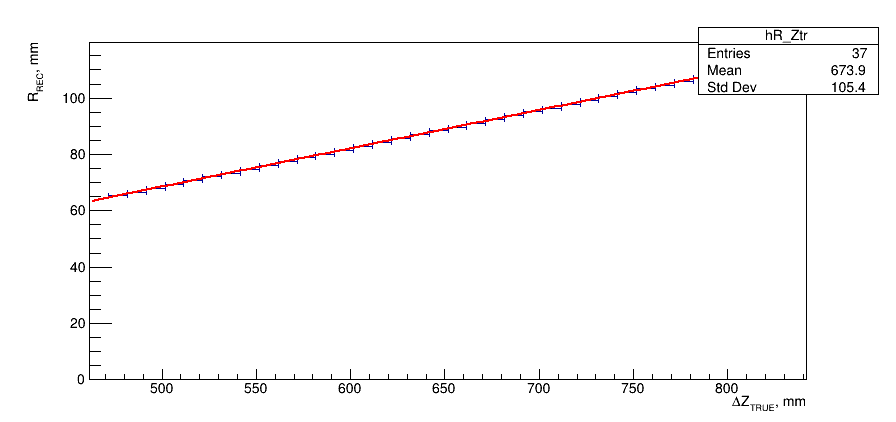

In [7]:
hR_Ztr = ROOT.TH1F("hR_Ztr",";#DeltaZ_{TRUE}, mm;R_{REC}, mm",38,851.6-390.0,851.6-10.0)
hR     = ROOT.TH1F("hR",";R_{REC},mm;events",30000,0,300)
hA     = ROOT.TH1F("hA",";#theta, mrad;events",200,100,300)
Nevt = 0
dT = 0.015
theta_true_list = []
vZ=[]
vR=[]
eZ=[]
eR=[]
for bin in range(1,38):
    hR.Reset()
    Rs = []
    Zs = []
    NN = 0
    for ev in my_events:
        if ev["Ttr"]>5.-dT and ev["Ttr"]<5.+dT:
            if ev["Z"]>10.*bin and ev["Ztr"]<10.*(bin+1):
                hR.Fill(ev["l"])
                Rs.append(ev["l"])
                Zs.append(851.6-ev["Ztr"])
                hA.Fill(1000.*ev["Atr"])
                theta_true_list.append( 1000.*ev["Atr"] )
                NN+=1
                Nevt+=1
    hR_Ztr[39-bin]=VE( median(Rs),(0.001*(3.52346+median(Zs)*0.0134859))**2)
    vR.append(median(Rs))
    eR.append((0.001*(3.52346+median(Zs)*0.0134859))**2)
    vZ.append(mean(Zs))
    eZ.append(stdev(Zs)/sqrt(NN))
    #print("Bin " + str(bin) + " is done" )
hR_Ztr.Draw("e1")
f_pol1 = ROOT.TF1("f_pol1","pol1(0)",851.6-390.0,851.6-10.0)
hR_Ztr.Fit(f_pol1)
ROOT.gPad.SetLogy(False)
canv.Draw()
tgA = VE(f_pol1.GetParameter(1),f_pol1.GetParError(1)**2)
#print(tgA)
import ostap.math.math_ve as math_ve
th_true = median(theta_true_list)
th_reco = 1000.*math_ve.atan(tgA)
print(str(Nevt)+" events")
print("TRUE mean " + str(th_true) + " mrad.") 
print("REC. mean " + str(th_reco) + " mrad.\t" + str(th_reco.prec())) 

GRAPH mean( 135.112 +- 0.0207848 ) mrad.	( 0.000153834 +- 2.36649e-08 )
 FCN=86.9787 FROM MIGRAD    STATUS=CONVERGED      44 CALLS          45 TOTAL
                     EDM=1.05851e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.98522e-01   1.41218e-02   1.03755e-05   1.57984e-03
   2  p1           1.35940e-01   2.11689e-05   6.48213e-08   3.74051e-01


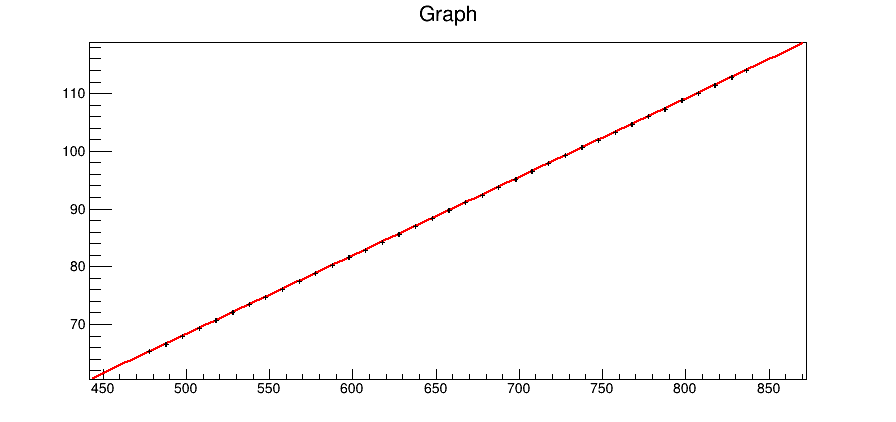

In [8]:
gr = makeGraph(vZ,vR,eZ,eR)
gr.Draw("AP")
gr.Fit(f_pol1)
tgG = VE(f_pol1.GetParameter(1),f_pol1.GetParError(1)**2)
th_gr = 1000.*math_ve.atan(tgG)
print("GRAPH mean" + str(th_gr) + " mrad.\t" + str(th_gr.prec()))
canv.Draw()

In [9]:
th_gr-th_true

( -0.0351407 +- 0.0207848 )

In [18]:
135.173-135.112/


0.06100000000000705